# Summer 2020 CS4641 Homework 3

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged, but each student must write his own answers and explicitly mention any collaborators.

* Either .py or .ipynb submission is fine. (You could save the notebook as .py file and then implement.)

## Instructions for the assignment

In this assignment, we have both coding and writing questions: you are asked to code and answer them in the cells.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You could directly type the Latex equations in the markdown cell.

- Typing with Latex is highly recommended. An image scan copy of handwritten would work if and only if you upload the images to a public cloud or github and refer them within your ipython notebook using the created url.

- We will provide some code for reference, and you are welcome to change the code as long as the final results are the same.

- Please comment "raise NotImplementedError" when you finish you code.

## 0 Set up
This notebook is tested under [python 3.6.8](https://www.python.org/downloads/release/python-368/), and the corresponding packages can be downloaded from [miniconda](https://docs.conda.io/en/latest/miniconda.html). You may also want to get yourself familiar with several packages:

- [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/)
- [numpy](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [matplotlib](https://matplotlib.org/users/pyplot_tutorial.html)

Please implement the functions that has "raise NotImplementedError", and after you finishing the coding, please delete or comment "raise NotImplementedError".

In [47]:
###############################
### DO NOT CHANGE THIS CELL ###
###############################

from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

%matplotlib inline  

import sys
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
from tqdm.notebook import tqdm_notebook as tqdm

print('Version information')

print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))

# Set random seed so output is all same
np.random.seed(1)

# url for image in KMeans
url = 'https://zbigatron.com/wp-content/uploads/2019/09/grumpy_cat.jpg'

Version information
python: 3.8.2 | packaged by conda-forge | (default, Mar 23 2020, 18:16:37) 
[GCC 7.3.0]
matplotlib: 3.2.1
numpy: 1.18.1


## 1. KMeans Clustering [35pts]

KMeans is trying to solve the following optimization problem:

\begin{align}
\arg \min_S \sum_{i=1}^K \sum_{x_j \in S_i} ||x_j - \mu_i||^2
\end{align}
where one needs to partition the N observations into K sets: $S = \{S_1, S_2, \ldots, S_K\}$ and each set has $\mu_i$ as its center.




### 1.1 pairwise distance [5pts]

Given $X \in \mathbb{R}^{N x D}$ and $Y \in \mathbb{R}^{M x D}$, obtain the pairwise distance matrix $dist \in \mathbb{R}^{N x M}$ using the euclidean distance metric, where $dist_{i, j} = ||X_i - Y_j||_2$.  

DO NOT USE A FOR LOOP in your implementation -- they are slow and will make your code too slow to pass our grader.  Use array broadcasting instead.

In [7]:
def pairwise_dist(x, y):
    """
    Args:
        x: N x D numpy array
        y: M x D numpy array
    Return:
        dist: N x M arrayp, where dist2[i, j] is the euclidean distance between 
        x[i, :] and y[j, :]
    """
    if type(x) is not np.ndarray:
        x=np.array(x)
    if type(y) is not np.ndarray:
        y = np.array(y)

    ND=np.shape(x)
    MD=np.shape(y)

#     dist=np.zeros((ND[0],MD[0]))
#     for i in range(ND[0]):
#         for j in range(MD[0]):
#             dist[i,j]=np.sqrt(np.dot(x[i,:],x[i,:]) - 2 * np.dot(x[i,:], y[j,:]) + np.dot(y[j,:], y[j,:]))
    
    threeSums = np.sum(np.square(x)[:,np.newaxis,:], axis=2) - 2 * x.dot(y.T) + np.sum(np.square(y), axis=1)
    dist = np.sqrt(threeSums)
    return dist
#     raise NotImplementedError

In [8]:
# TEST CASE
# x = np.random.randn(2, 2)
# y = np.random.randn(3, 2)


x=[[ 1.62434536,-0.61175641],
 [-0.52817175,-1.07296862]]
y=[[ 0.86540763,-2.3015387],
 [ 1.74481176,-0.7612069 ],
 [ 0.3190391,-0.24937038]]

print("*** Expected Answer ***")
print("""==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]""")


print("\n*** My Answer ***")
print("==x==")
print(x)
print("==y==")
print(y)
print("==dist==")
print(pairwise_dist(x, y))

*** Expected Answer ***
==x==
[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]]
==y==
[[ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]]
==dist==
[[1.85239052 0.19195729 1.35467638]
 [1.85780729 2.29426447 1.18155842]]

*** My Answer ***
==x==
[[1.62434536, -0.61175641], [-0.52817175, -1.07296862]]
==y==
[[0.86540763, -2.3015387], [1.74481176, -0.7612069], [0.3190391, -0.24937038]]
==dist==
[[1.85239053 0.19195729 1.35467637]
 [1.85780729 2.29426446 1.18155841]]


### 1.2 KMeans Implementation [25pts]

In this section, you are asked to implement the kmeans algorithm. Below is a template which requires you to implement some member functions that haven't been implemented yet.

For the function signature, please see the corresponding doc strings.

In [9]:
class KMeans(object):

    def __init__(self): #No need to implement
        pass

    def _init_centers(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            kwargs: any additional arguments you want
        Return:
            centers: K x D numpy array, the centers.
        Note:
            This is one initialization method, and you could change it if you prefer, however it is not required.
        """
        unique_points = np.unique(points, axis=0)
        K = min(K, unique_points.shape[0])
        idx = np.random.permutation(unique_points.shape[0])[:K]
        return unique_points[idx]

    def _update_assignment(self, centers, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            points: NxD numpy array, the observations
        Return:
            cluster_idx: numpy array of length N, the cluster assignment for each point
            
        Hint: You could call pairwise_dist() function.
        """
        # TODO [10pts]
        cluster_idx = np.argmin(pairwise_dist(points, centers), axis=1)
        return np.transpose(cluster_idx)
#         raise NotImplementedError

    def _update_centers(self, old_centers, cluster_idx, points):
        """
        Args:
            old_centers: old centers KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            centers: new centers, K x D numpy array, where K is the number of clusters, and D is the dimension.
        Note:
            It is possible to have fewer centers after this step (we provide the reference code).
        """
        new_k = 0
        centers = np.copy(old_centers)
        K = old_centers.shape[0]
        for k in range(K):
            # TODO: update centers and new_k here [5pts]
#             cluster = points[np.argwhere(cluster_idx == k)]
#             new_k=cluster.shape[0]
            idxes = np.where(cluster_idx == k)[0]
            centers[new_k, :] = np.mean(points[idxes], axis=0)
            new_k += 1
        if new_k < K:
            print("Warning, reducing K from %d to %d\n" % (K, new_k))
            K = new_k
            centers = centers[:K]
        return centers
        raise NotImplementedError

    def _get_loss(self, centers, cluster_idx, points):
        """
        Args:
            centers: KxD numpy array, where K is the number of clusters, and D is the dimension
            cluster_idx: numpy array of length N, the cluster assignment for each point
            points: NxD numpy array, the observations
        Return:
            loss: a single float number, which is the objective function of KMeans. 
        Hint:
            Use pairwise_dist().
        """
        # TODO [10pts]
#         cluster_idx = self._update_assignment(centers, points)
        return (np.linalg.norm(points - centers[cluster_idx]) ** 2).sum()
#         raise NotImplementedError
        
    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, verbose=False, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations (Hint: You could change it when debugging)
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            verbose: boolean to set whether method should print loss (Hint: helpful for debugging)
            kwargs: any additional arguments you want
        Return:
            cluster assignments: Nx1 int numpy array
            cluster centers: K x D numpy array, the centers
            loss: final loss value of the objective function of KMeans
        Note: 
            You don't need to change it.
        """
        centers = self._init_centers(points, K, **kwargs)
        for it in range(max_iters):
            cluster_idx = self._update_assignment(centers, points)
            centers = self._update_centers(centers, cluster_idx, points)
            loss = self._get_loss(centers, cluster_idx, points)
            K = centers.shape[0]
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            if verbose:
                print('iter %d, loss: %.4f' % (it, loss))
        return cluster_idx, centers, loss

### 1.3 Pixel Clustering

In this section, you will use your K-Means algorithm to do pixel clustering which compresses the image using K colors.

In [10]:
# helper function for plotting images. You don't have to modify it

def plot_images(img_list, title_list, figsize=(11, 6)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis('off')

In [11]:
# helper function for plotting images. You don't have to modify it

def cluster_pixels_kmeans(image, K):
    """Clusters pixels in the input image
    
    Args:
        image: input image of shape(H, W, 3)
        K: number of clusters
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    cluster_ids, centers, loss = KMeans()(flat_img, K)
    kmeans_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    return kmeans_img

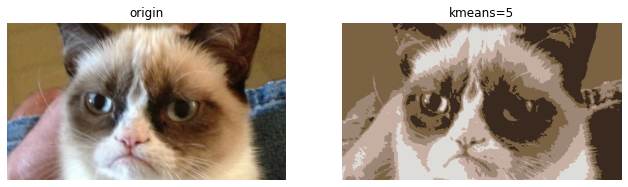

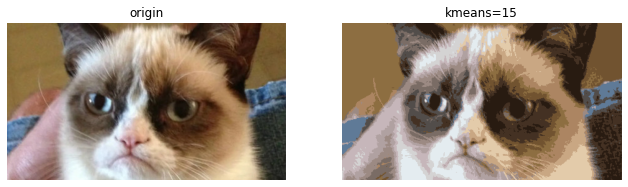

In [12]:
# helper function for plotting images. You don't have to modify it

image = imageio.imread(imageio.core.urlopen(url).read())

kmeans_image_5 = cluster_pixels_kmeans(image, 5)
plot_images([image, kmeans_image_5], ['origin', 'kmeans=5'])

kmeans_image_15 = cluster_pixels_kmeans(image, 15)
plot_images([image, kmeans_image_15], ['origin', 'kmeans=15'])

### 1.4 Find the optimal number of clusters [5pts]

You will now use the elbow method to find the optimal number of clusters to use for pixel clustering the given image.

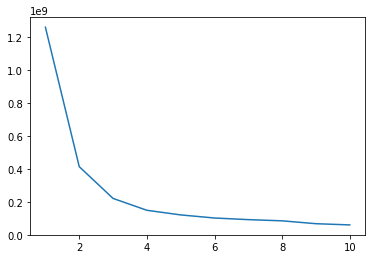

In [13]:
def find_optimal_num_clusters(image, max_K=10):
    """Plots loss values for different number of clusters in K-Means
    
    Args:
        image: input image of shape(H, W, 3)
        max_K: number of clusters
    Return:
        None (plot loss values against number of clusters)
    """
    im_height, im_width, im_channel = image.shape
    x_vals = np.arange(1,max_K+1)
    losses = []
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    for i in range(1, max_K+1):
        # TODO: append losses here
        cluster_ids, centers, loss = KMeans()(flat_img, i )
        losses.append(loss)
        
    plt.plot(x_vals, losses)
#     raise NotImplementedError

find_optimal_num_clusters(image)

## 2. GMM implementation [35 pts]

GMM is trying to do MLE (maximum likelihood estimation). It approximates the distribution of data using a set of gaussian distributions. Here we assume that each gaussian component has diagonal covariance matrix, which makes it easier to calculate the density. 

Given $N$ samples $X = [x_1, x_2, \ldots, x_N]$, we are asked to find $K$ diagonal gaussian distributions to model the data $X$: 

\begin{align}
    \max_{\{\mu_k, \sigma_k\}_{k=1}^K} \sum_{i=1}^N \log \big( \sum_{k=1}^{K} \pi(k) \mathcal{N}(x_i | \mu_k, \sigma_k)\big)
\end{align}

- For undergaduate student: you may assume the covariance matrix is diag matrix, which means the features are independent. (i.e. the red intensity of a pixel is independent from its blue intensity, etc). 
- For graduate student: please assume full covariance matrix.

**Hints**

1. Here $\pi(\cdot)$ is the prior of the latent variable. It is also called the mixture coefficient. To make it simple, we assume $\pi(k) = \frac{1}{K}, \forall k = 1, 2, \ldots, K$.

2. As we create our model, we will need to use a multivariate Gaussian since our pixels are 3-dimensional vectors corresponding to red, green, and blue color intensities.  It means that for each image, you need to convert it into a N*3 matrix, where N is the number of pixels, and 3 is the number of features.

The following example from a machine learning textbook may be helpful:

3. In this question, each pixel has three features, which are R, G, and B.

4. At EM steps, gamma means $\tau\left(z_{n k}\right)$ at our slide of GMM, which is called the responsibility. If we have K components, each data point (pixel) will have K responsibility values.

5. For E steps, we already get the log-likelihood at ll_joint() function. For the fomula at our slide:
$$
\tau\left(z_{n k}\right)=\frac{\pi_{k} N\left(x_{n} | \mu_{k}, \Sigma_{k}\right)}{\sum_{j=1}^{K} \pi_{j} N\left(x_{n} | \mu_{j}, \Sigma_{j}\right)},
$$
ll_joint equals to the $N$ here. Thus, You should be able to finish E steps with just a few lines of code by using ll_joint() and softmax() defined above.

## 2.1 Helper functions

### softmax [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $prob \in \mathbb{R}^{N x D}$, where $prob_{i, j} = \frac{\exp(logit_{i, j})}{\sum_{d=1}^D exp(logit_{i, k})}$.

Note that it is possible that $logit_{i, j}$ is very large, making $\exp(\cdot)$ of it to explode. To make sure it is numerical stable, you may need to subtract the maximum for each row of $logits$.  As in calculating pairwise distances, DO NOT USE A FOR LOOP.

In [14]:
def softmax(logits):
    """
    Args:
        logits: N x D numpy array
    """
#     assert len(logits.shape) == 2
#     s = np.max(logits, axis=1)
#     s = s[:, np.newaxis] # necessary step to do broadcasting
#     e_x = np.exp(logits - s)
#     div = np.sum(e_x, axis=1)
#     div = div[:, np.newaxis] # dito
#     #compare

    # find axis
    y = np.atleast_2d(logits)

    # subtract the max for numerical stability
    y = y - np.expand_dims(np.max(y,axis=1), axis=1)
    y = np.exp(y)

    # take the sum along the specified axis
    ax_sum = np.expand_dims(np.sum(y, axis = 1), axis=1)

    # finally: divide elementwise
    p = y / ax_sum

    # flatten if X was 1D
    if len(logits.shape) == 1: p = p.flatten()

    return p
#     return e_x / div

#     if type(logits) is not np.ndarray:
#         row = np.array(logits)
#         print("yes")
#     sum = np.sum(np.exp(row))
#     return np.exp(row)/sum
#     raise NotImplementedError
    
logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]""")

print("My answer:")
print(softmax(logits))

Correct answer:
===softmax===
[[0.5        0.5       ]
 [0.26894143 0.7310586 ]]
My answer:
[[0.5       0.5      ]
 [0.2689414 0.7310586]]


### logsumexp [5 pts]

Given $logit \in \mathbb{R}^{N x D}$, calculate $s \in \mathbb{R}^N$, where $s_i = \log \big( \sum_{j=1}^D \exp(logit_{i, j}) \big)$. Again, pay attention to the numerical problem. You may want to use similar trick as in the softmax function.  DO NOT USE A FOR LOOP.

In [15]:
def logsumexp(logits):
    """
    Args:
        logits: N x D numpy array
    Return:
        s: N x 1 array where s[i,0] = logsumexp(logits[i,:])
    """
    a = np.asarray(logits)
    shp = list(a.shape)
    shp[1] = 1
    print("shp", shp)
    a_max = a.max(axis=1)
    s = np.log(np.exp(a - a_max.reshape(shp)).sum(axis=1))
    lse  = a_max + s
    lse=lse.reshape(shp[0],1)
    print("shape", lse.shape)
    return lse
#     maxL = np.max(logits,axis=0)
#     print("exp",np.exp(-998))
#     print("logits is",logits)
#     print("maxL is ",maxL)
#     ds = logits - maxL
#     print("ds is",ds)
#     sumUp = np.exp(ds).sum()
#     return maxL + np.log(sumUp)
#     raise NotImplementedError


logits = np.array([[1000, 1000], 
                   [1, 2]], dtype=np.float32)
print("""Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]""")

print("My answer: ")
print(logsumexp(logits))

Correct Answer:
===logsumexp===
[[1000.6932   ]
 [   2.3132617]]
My answer: 
shp [2, 1]
shape (2, 1)
[[1000.6932   ]
 [   2.3132617]]


## 2.2 GMM Implementations [25pts]

In [61]:
class GMM(object):
    def __init__(self): # No need to implement
        pass
        
    def _init_components(self, points, K, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            K: number of components
            kwargs: any other args you want
        Return:
            pi: numpy array of length K, prior
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Note: We use the K-means results to initial GMM. It will help to converge. You could modify it but is not required.
        """
        ids, mu, _ = KMeans()(points, K)
        sigma = np.ones((K, points.shape[1]))
        for k in range(K):
            p = points[np.where(ids == k)[0], :]
            sigma[k, :] = np.std(p, axis=0)
        pi = np.ones((1, K)) / K
        return pi, mu, sigma

    def _ll_joint(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            ll(log-likelihood): NxK array, where ll(i, j) = log pi(j) + log NormalPDF(points_i | mu[j], sigma[j])
            
        Hint: Assume that the three dimensions of our multivariate gaussian are independent.  
              This allows you to write treat it as a product of univariate gaussians.
        """
        # TODO [10pts]
        K=mu.shape[0]
        N=points.shape[0]
#         ll=np.zeros((N,K))
#         for n in range(N):
#             for k in range(K):
#                 var = np.random.multivariate_normal(mean=mu[k], cov=sigma[k])
#                 norm=np.array(var.pdf(points[n]))
#                 ll[n][k]=np.log(pi[0][k])+norm
#         return ll
        ll= np.zeros(shape=(N,K))
        print("_ll_joint starts")
        for k in range(K):
            temp1 = 2*np.square(sigma[k])
            temp2=points-mu[k]
            a = -np.square(temp2)/temp1 # step 1: calcualte the distance bet points to its center,  
                        # points --->(N,D), mu[k] ---> (D,)
            a = a - 0.5*np.log(2*np.pi)-np.log(sigma[k]) # step 2: in here the size of sigma is (D,)
            ll[:,k] = np.sum(a,axis=1) # step 3: calculate each column of ll
        ll += np.log(np.pi)
        return ll
#         N = points.shape[0]  # number of objects
#         K = pi.shape[0]  # number of clusters
#         d = mu.shape[1]  # dimension of each object
#         gamma = np.zeros((N, K))  # distribution q(T)
#         for i in range(K):
#             gamma[:, i] = pi[i] * scipy.stats.multivariate_normal(mean=mu[i], cov=sigma[i]).pdf(points)
#         print("_ll_joint ends")
#         return gamma
#         raise NotImplementedError

    def _E_step(self, points, pi, mu, sigma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian.
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            
        Hint: You should be able to do this with just a few lines of code by using softmax() defined above. 
        """
        ll_joint = self._ll_joint(points, pi, mu, sigma)
        # TODO [5pts]
        gamma = softmax(ll_joint)
        return gamma
#         raise NotImplementedError

    def _M_step(self, points, gamma, **kwargs):
        """
        Args:
            points: NxD numpy array, the observations
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
        Return:
            pi: np array of length K, the prior of each component
            mu: KxD numpy array, the center for each gaussian. 
            sigma: KxD numpy array, the diagonal standard deviation of each gaussian. 
        Note:
            We provided the example for how to update mu.
        """
        print("M step starts")
        K = gamma.shape[1]
        D = points.shape[1]
        N=points.shape[0]
        mu = np.zeros((K, D))
        sigma = np.zeros((K, D))
        for k in range(K):
            # update mu
            weights = np.reshape(gamma[:, k], [-1, 1])
            w = np.sum(weights)
            w_mu = np.sum(points * weights, axis=0)
            w_mu = w_mu / w
            mu[k, :] = w_mu
    
            # TODO: update sigme [5pts]
            s = np.sum(weights*np.square(points - mu[k]),axis=0)
            s=s/w
            sigma[k, :]=s
            pi=np.sum(gamma/N, axis=0, keepdims=True)

            # TODO: update pi [5pts]
        pi = None
        return pi, mu, sigma
            
#         raise NotImplementedError

    def __call__(self, points, K, max_iters=100, abs_tol=1e-16, rel_tol=1e-16, **kwargs):
        """
        Args:
            points: NxD numpy array, where N is # points and D is the dimensionality
            K: number of clusters
            max_iters: maximum number of iterations
            abs_tol: convergence criteria w.r.t absolute change of loss
            rel_tol: convergence criteria w.r.t relative change of loss
            kwargs: any additional arguments you want
        Return:
            gamma: NxK array, the posterior distribution (a.k.a, the soft cluster assignment) for each observation.
            (pi, mu, sigma): (1xK np array, KxD numpy array, KxD numpy array), mu and sigma.
        
        Hint: You do not need to change it. For each iteration, we process E and M steps, then 
        """        
        pi, mu, sigma = self._init_components(points, K, **kwargs)
        pbar = tqdm(range(max_iters))
        for it in pbar:
            # E-step
            gamma = self._E_step(points, pi, mu, sigma)
            
            # M-step
            pi, mu, sigma = self._M_step(points, gamma)
            
            # calculate the negative log-likelihood of observation
            joint_ll = self._ll_joint(points, pi, mu, sigma)
            loss = -np.sum(logsumexp(joint_ll))
            if it:
                diff = np.abs(prev_loss - loss)
                if diff < abs_tol and diff / prev_loss < rel_tol:
                    break
            prev_loss = loss
            pbar.set_description('iter %d, loss: %.4f' % (it, loss))
        return gamma, (pi, mu, sigma)

In this section, you will use your GMM algorithm to do pixel clustering.

In [55]:
# helper function for plotting images. You don't have to modify it
def cluster_pixels_gmm(image, K):
    """Clusters pixels in the input image
    
    Args:
        K: number of components
    Return:
        clustered_img: image of shape(H, W, 3) after pixel clustering
    """
    im_height, im_width, im_channel = image.shape
    flat_img = np.reshape(image, [-1, im_channel]).astype(np.float32)
    gamma, (pi, mu, sigma) = GMM()(flat_img, K=K, max_iters=100)
    cluster_ids = np.argmax(gamma, axis=1)
    centers = mu

    gmm_img = np.reshape(centers[cluster_ids], (im_height, im_width, im_channel))
    
    return gmm_img

In [62]:
# helper function for plotting images. You don't have to modify it
image = imageio.imread(imageio.core.urlopen(url).read())

gmm_image_5 = cluster_pixels_gmm(image, 5)
plot_images([image, gmm_image_5], ['origin', 'gmm=5'])

gmm_image_15 = cluster_pixels_gmm(image, 15)
plot_images([image, gmm_image_15], ['origin', 'gmm=15'])

_ll_joint starts



TypeError: _ll_joint() missing 3 required positional arguments: 'pi', 'mu', and 'sigma'

# 3. Compare KMeans with GMM [15pts]

In this section, we are going to have a comparison between the two algorithms.

Note: You could complete this part first and use this graph to help with debugging the previous two parts.

## mixture model

We first create a dataset that is sampled from the mixture model. To do so, you first need a sampling method, that can sample from this mixture model. The sampling procedure looks like this:

- first sample a component id according to prior distribution $\pi(\cdot)$
- then choose the corresponding gaussian distribution, and sample from that gaussian

In [ ]:
def plot_scatter(samples, ids):
    colors = np.zeros((len(ids), 3))
    choices = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
    num_points = []
    for i in range(3):
        num_points.append(np.sum(ids == i))
    maps = np.argsort(num_points)
    for i in range(3):
        colors[np.where(ids == maps[i]), :] = choices[i]
    plt.scatter(samples[:, 0], samples[:, 1], s=1, color=colors)
    plt.axis('equal')

In [ ]:
def gmm_sampling(num_samples, pi, mu, sigma):
    """
    Args:
        num_samples: number of samples required
        pi: np array of length K, the prior distribution, where K is # components
        mu: KxD np array, the center for each gaussian, where D is data dimension
        sigma: KxD np array, the standard deviation for each gaussian
    Return:
        samples: NxD np array, the result samples
        ids: np array of length N, the component id for each sample
    TODO:
        use comp_sigma and comp_mu to generate samples
    """
    D = mu.shape[1]
    comp_ids = np.random.multinomial(1, pi, size=num_samples).astype(mu.dtype)
    comp_mu = np.dot(comp_ids, mu)
    comp_sigma = np.dot(comp_ids, sigma)
    #TODO [5pts]
    samples = None
    return samples, np.argmax(comp_ids, axis=1)
    raise NotImplementedError

pi = np.array([0.8, 0.1, 0.1])
mu = np.array([[0.5, 0.5], 
               [0.25, 0.75], 
               [0.75, 0.75]], dtype=np.float64)
sigma = np.array([[0.1, 0.1], 
                  [0.05, 0.05], 
                  [0.05, 0.05]], dtype=np.float64)
samples, ids = gmm_sampling(10000, pi, mu, sigma)
plot_scatter(samples, ids)

In [ ]:
# Plots: [5pts]

# 1) Let's see how KMeans does in this case
# TODO: run it and print the plot
ids, centers,_ = KMeans()(samples, K=3)
plot_scatter(samples, ids)

In [ ]:
# 2) Let's see how GMM does in this case
# TODO: run it and print the plot
gamma, (pi, mu, sigma) = GMM()(samples, K=3, max_iters=1000)
ids = np.argmax(gamma, axis=1)
plot_scatter(samples, ids)

- Question: explain the reason for the different results of Kmeans and GMM. [5pts]

- Answer:

# 4. Written Questions [15pts]

In this section, you are asked to answer several question. You are expected to write down the answers in the notebook markdown cells (similar to the current one you are reading). You can also type Latex equations if necessary.

- Is it guaranteed that GMM with EM always converges to the optimal solution? 

- Is KMeans always guaranteed to converge (to some local optima)?